## <h1><center>Titanic Disaster Survival Using Logistic Regression</center></h1>

### Introduction


This analysis presents a comprehensive overview and solution for the Kaggle Titanic survival prediction dataset. The approach taken in this documentation aims to be accessible for beginners, avoiding unnecessary technical language while thoroughly explaining each step of the analysis. Additionally, fundamental data science concepts and terminology are briefly outlined for a clearer understanding.

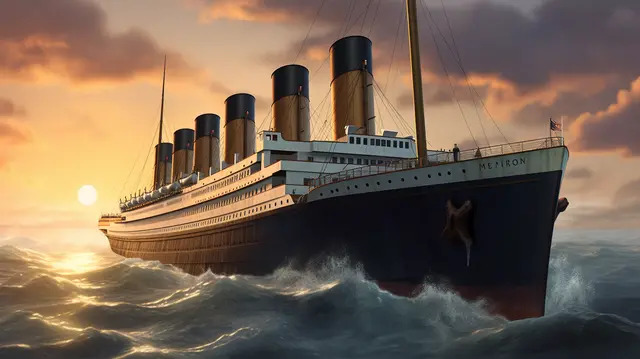

### Problem statement

Given what we know about a passenger aboard the Titanic, can we predict whether or not this passenger has survived? In other words, we are training a machine learning model to learn the relationship between passenger features and their survival outcome and susbsequently make survival predictions on passenger data that our model has not been trained on.

This is a binary classfication problem in machine learning as we are classifying the outcomes of passengers as either survived or did not survive in the Titanic.

### Steps Involved

- Feature Engineering
- Imputation
- Training and Prediction

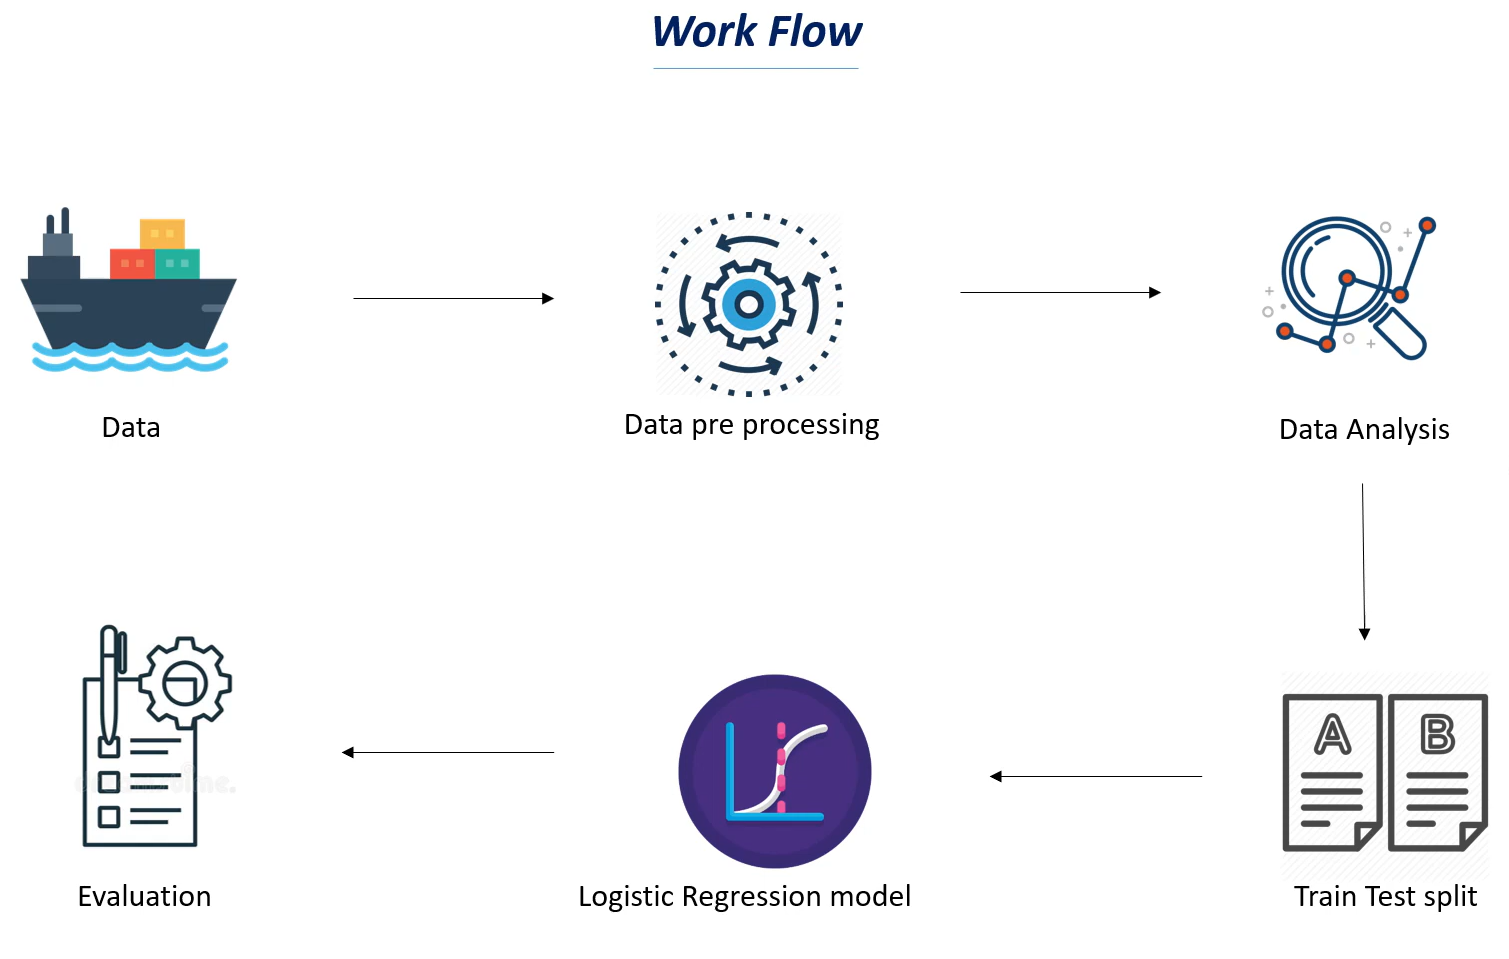

### Data Description

Below are the description of the features in the data:

**`Survival`**: 0 = Did not survive, 1 = Survived

**`Pclass`**: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

**`Sex`**: Male or female

**`Age`**: Age in years, fractional if less than 1

**`SibSp`**: Number of siblings or spouses aboard the titanic

**`Parch`**: Number of parents or children aboard the titanic

**`Ticket`**: Passenger ticket number

**`Fare`**: Passenger fare

**`Cabin`**: Cabin number

**`Embarked`**: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

### Dataset

Data Set Link :(https://www.kaggle.com/c/titanic)

### Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading/Importing Datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
len(train)

891

In [4]:
len(test)

418

- #### **Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [5]:
train.shape
print("The Number of rows in the train dataset are:",train.shape[0])
print("The Number of columns in the train dataset are:",train.shape[1])

The Number of rows in the train dataset are: 891
The Number of columns in the train dataset are: 12


In [6]:
train.shape
print("The Number of rows in the test dataset are:",test.shape[0])
print("The Number of columns in the test dataset are:",test.shape[1])

The Number of rows in the test dataset are: 418
The Number of columns in the test dataset are: 11


**View the data using head function which returns top  rows**

In [82]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [83]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [84]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [85]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [88]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [89]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Data Dictionary
**`Survived`**: Indicates passenger survival (0 = No, 1 = Yes).

**`Pclass`**: Represents ticket class (1st, 2nd, 3rd).

**`SibSp`**: Number of siblings/spouses aboard.

**`Parch`**: Number of parents/children aboard.

**`Ticket`**: Unique ticket number.

**`Cabin`**: Cabin number where the passenger stayed.

**`Embarked`**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [90]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [91]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization using Matplotlib and Seaborn packages.

**Find out how many survived vs not Survived using countplot**

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


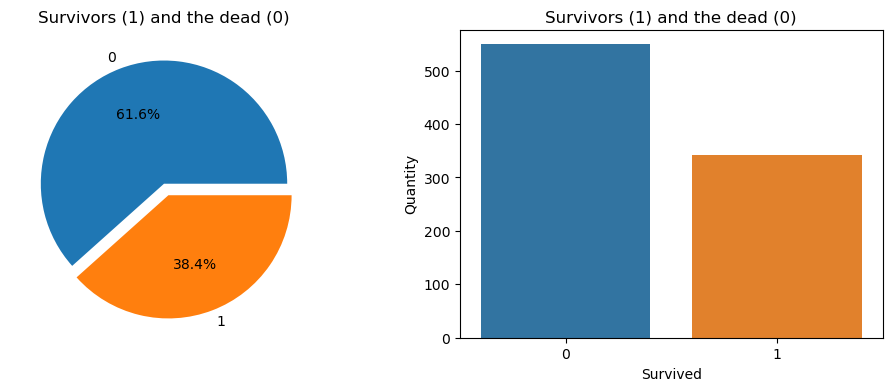

In [20]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train['Survived'].value_counts().plot.pie( 
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 
sns.countplot('Survived', data=train, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show() 

**`Based on the graph, it is evident that a significant number of passengers did not survive the disaster, indicating a high mortality rate among the Titanic passengers.`**

#### **Male vs Female Survival**

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


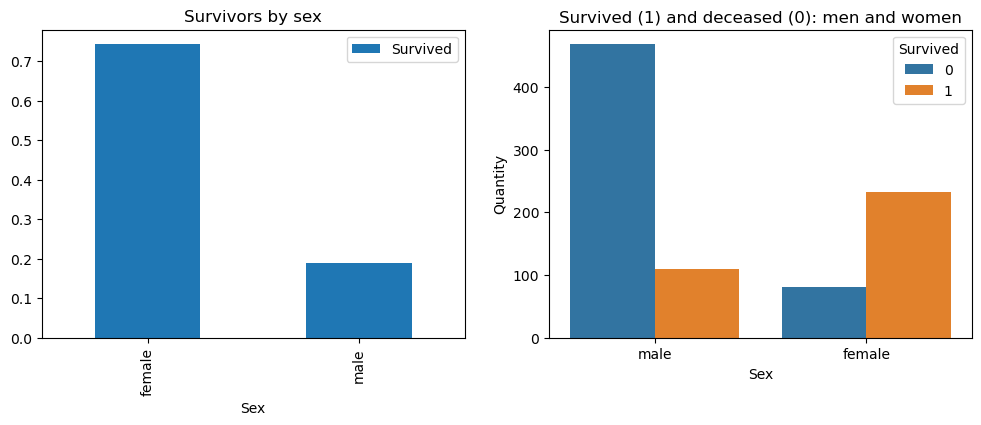

In [23]:
f,ax = plt.subplots(1, 2, figsize=(12, 4)) 
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show() 

**`The chart demonstrates that women had a considerably higher survival rate than men, emphasizing the priority given to women during the rescue efforts of the Titanic disaster.`**

### Pclass Vs Survival Count

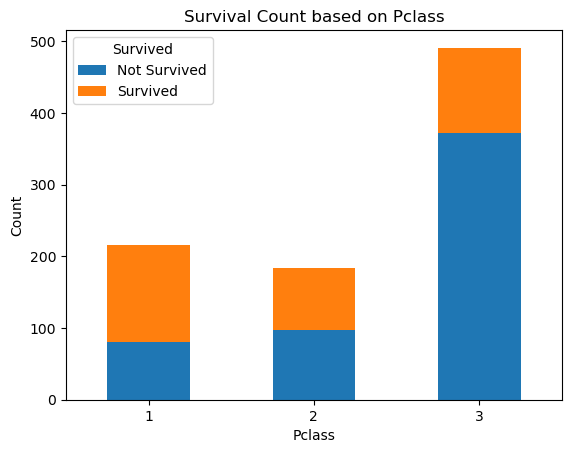

In [24]:
# Create a DataFrame from the data
df = pd.DataFrame(train)

# Group the data by 'Pclass' and 'Survived' columns and count the occurrences
grouped_data = df.groupby(['Pclass', 'Survived']).size().unstack()

# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Count based on Pclass')
plt.legend(title='Survived', loc='upper left', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()

- **`The chart conclusively shows that passengers in the 1st class had a significantly higher survival rate compared to other classes, highlighting the preferential treatment given to higher-class passengers during the Titanic disaster.`** 


- **`Conversely, passengers in the 3rd class experienced a notably higher mortality rate, underscoring the disparities in survival chances based on socio-economic status.`**

### SibSp vs Survival Count

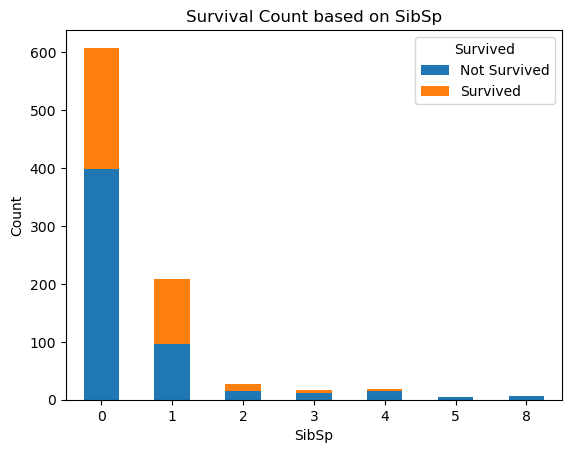

In [11]:
# Create a DataFrame from the data
df = pd.DataFrame(train)

# Group the data by 'SibSp' and 'Survived' columns and count the occurrences
grouped_data = df.groupby(['SibSp', 'Survived']).size().unstack()

# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Survival Count based on SibSp')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()

- **`The chart affirms that individuals traveling with more than 2 siblings or spouses had a higher likelihood of survival.`**


- **`Conversely, those who boarded without siblings or spouses faced a higher probability of not surviving, emphasizing the impact of family connections on passenger survival during the disaster.`**

### Parch (Parents and Children) vs Survival Count

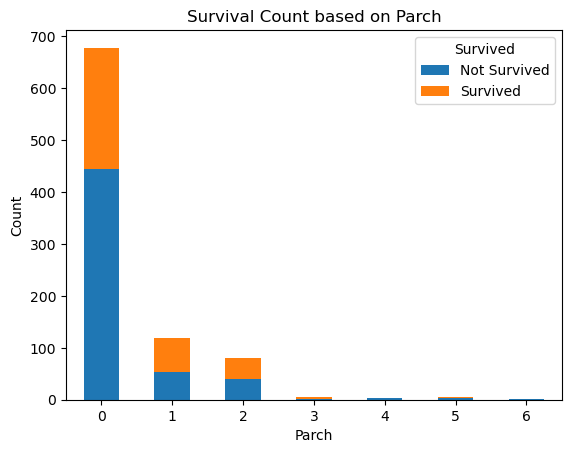

In [12]:
# Create a DataFrame from the data
df = pd.DataFrame(train)

# Group the data by 'SibSp' and 'Survived' columns and count the occurrences
grouped_data = df.groupby(['Parch', 'Survived']).size().unstack()

# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Survival Count based on Parch')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()

- **`The chart validates that individuals traveling with more than 2 parents or children were more likely to survive the disaster.`**


- **`In contrast, those who boarded alone had a higher likelihood of not surviving, highlighting the significance of family units in enhancing survival chances during the tragic event.`**

### Embarked Vs Survival Rate

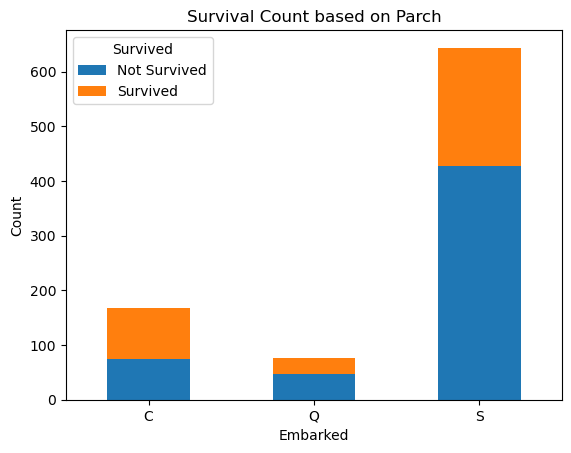

In [14]:
# Create a DataFrame from the data
df = pd.DataFrame(train)

# Group the data by 'SibSp' and 'Survived' columns and count the occurrences
grouped_data = df.groupby(['Embarked', 'Survived']).size().unstack()

# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival Count based on Parch')
plt.legend(title='Survived', loc='upper left', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()

- **`The chart confirms that passengers embarking from Cherbourg (C) had a slightly higher likelihood of survival.`**


- **`Conversely, passengers embarking from Queenstown (Q) were more likely to not survive, as were those embarking from Southampton (S).`**


- **`These findings underscore the varying survival rates based on the port of embarkation, emphasizing the impact of departure location on passengers' fates during the disaster.`**

**Check for null**

In [21]:
train.isna()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

**Check for how many values are null**

In [22]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Visualize null values**

<AxesSubplot:>

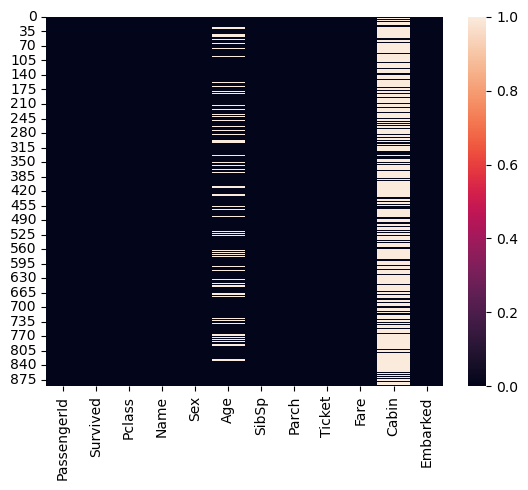

In [25]:
sns.heatmap(train.isna())

In [27]:
#find the % of null values in age column
(train['Age'].isna().sum()/len(train['Age']))*100

19.865319865319865

In [28]:
#find the % of null values in cabin column
(train['Cabin'].isna().sum()/len(train['Age']))*100

77.10437710437711

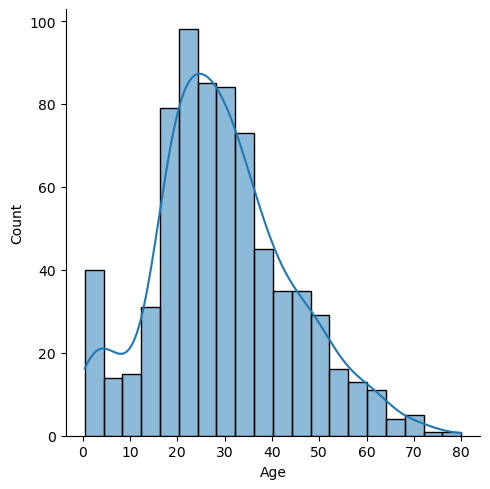

In [29]:
#find the distribution for the age column
sns.displot(x='Age',data=train, kde = True)

<h1>Data Cleaning

**Fill the missing values**<br> we will fill the missing values for age. In order to fill missing values we use fillna method.<br> For now we will fill the missing age by taking average of all age 

In [30]:
#fill age column
train['Age'].fillna(train['Age'].mean(),inplace=True)

**We can verify that no more null data exist** <br> we will examine data by isnull mehtod which will return nothing

In [32]:
#verify null value
train['Age'].isna().sum()

0

**Alternatively we will visualise the null value using heatmap**<br>
we will use heatmap method by passing only records which are null. 

<AxesSubplot:>

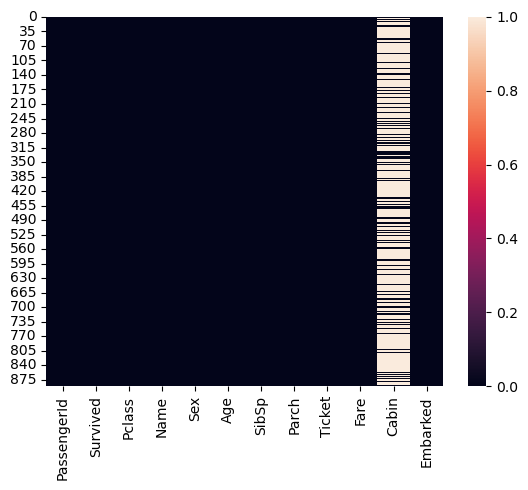

In [34]:
#visualize null values
sns.heatmap(train.isna())

**We can see cabin column has more number of null values, as such we can not use it for prediction. Hence we will drop it**

In [35]:
#Drop cabin column
train.drop('Cabin',axis=1,inplace=True)

In [36]:
#see the contents of the data
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

**Preaparing Data for Model**<br>
Now we will require to convert all non-numerical columns to numeric. Please note this is required for feeding data into model. Lets see which columns are non numeric info describe method.

In [38]:
#Check for the non-numeric column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [39]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

**We can see, Name, Sex, Ticket and Embarked are non-numerical.It seems Name,Embarked and Ticket number are not useful for Machine Learning Prediction hence we will eventually drop it. For Now we would convert Sex Column to dummies numerical values******

In [40]:
#convert sex column to numerical values
gender=pd.get_dummies(train['Sex'],drop_first=True)

In [42]:
train['Gender']=gender

In [43]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Gender  
0      0         A/5 21171   7.2500        S       1  
1      0          PC 17599  71.2833        C       0  
2      0  STON/O2. 3101282   7.9250        S       0  
3      0            113803  53.1000        S       0  
4      0            373450   8.0500        S       1

### Feature Engineering

Now let’s see which columns should we drop and/or modify for the model to predict the testing data. The main tasks in this step is to drop unnecessary features and to convert string data into the numerical category for easier training.

We’ll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it. But we will make a new column from the Cabins column to see if there was cabin information allotted or not.

In [44]:
#drop the columns which are not required
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [45]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Gender
0            1         0       3  22.0      1      0   7.2500       1
1            2         1       1  38.0      1      0  71.2833       0
2            3         1       3  26.0      0      0   7.9250       0
3            4         1       1  35.0      1      0  53.1000       0
4            5         0       3  35.0      0      0   8.0500       1

In [47]:
#Seperate Dependent and Independent variables
x=train[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=train['Survived']

<h1>Data Modelling

**Building Model using Logestic Regression**

**Build the model**

In [50]:
#import train test split method
from sklearn.model_selection import train_test_split

In [51]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [52]:
#import Logistic  Regression
from sklearn.linear_model import LogisticRegression

In [53]:
#Fit  Logistic Regression 
lr=LogisticRegression()

In [54]:
lr.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
predict=lr.predict(x_test)

<h1>Testing

**See how our model is performing**

In [56]:
#print confusion matrix 
from sklearn.metrics import confusion_matrix

In [57]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No            151             24
Actual Yes            38             82

In [58]:
#import classification report
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295



### Conclusion

- Considering the selected model and the available data, the precision level achieved is satisfactory. 


- To enhance accuracy, incorporating additional features that were previously excluded or exploring alternative models could be explored. 


- It's important to note that precision, recall, and F1 score are vital metrics in evaluating predictive performance, with precision specifically indicating the ratio of accurately predicted positive observations to the total predicted positive observations. 


- A balanced approach considering both precision and recall can further optimize the model's effectiveness.

### How Did Titanic Sink?

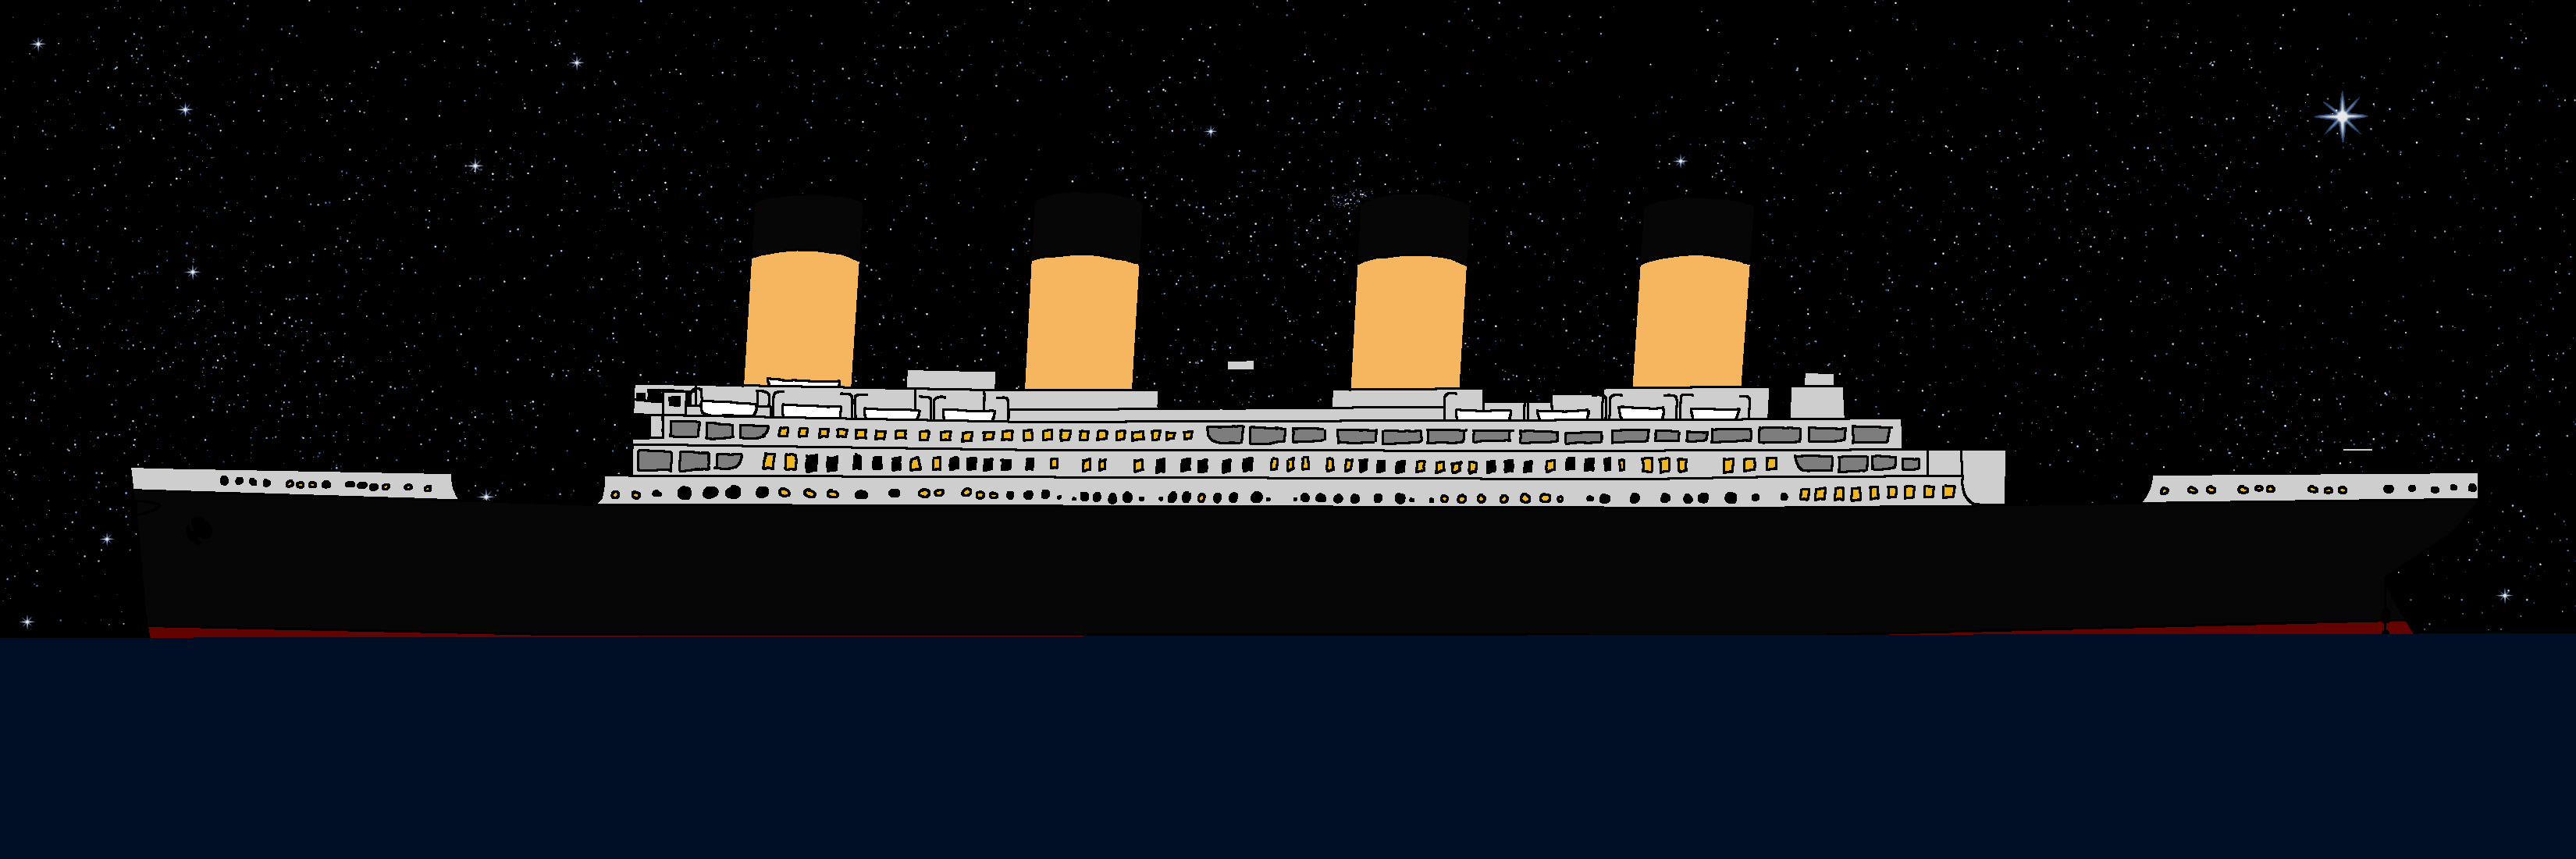

Image url = ('https://www.rebellionresearch.com/why-did-titanic-sink-a-scientific-analysis')

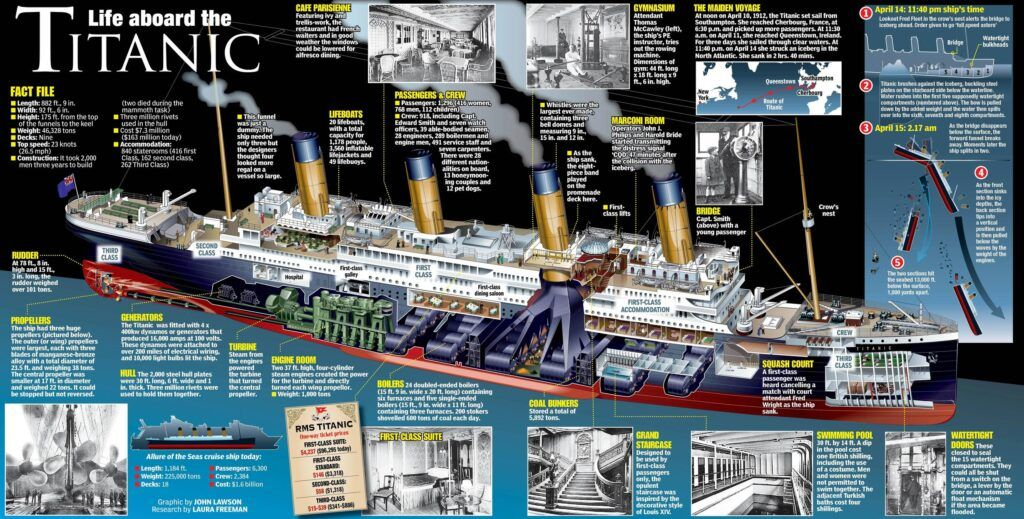